In [3]:
# https://blog.csdn.net/weixin_44615820/article/details/88693275
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline
mpl.rcParams['font.sans-serif'] = ['simhei']
mpl.rcParams['font.serif'] = ['simhei']
plt.rc("font",family="SimHei",size="14") 
sns.set_style("darkgrid")

cancer=pd.read_csv("./data/breast-cancer-train.csv")
cancer.columns=['class','age','menopause','tumor-size','inv-nodes','node-caps','deg-malig','breast','breast-quad','irradiat']
cancer.head()
#cancer.info()

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,40-49,premeno,0-4,0-2,no,3,left,central,no
1,no-recurrence-events,50-59,ge40,25-29,0-2,no,2,left,left_low,no
2,no-recurrence-events,60-69,lt40,10-14,0-2,no,1,left,right_up,no
3,no-recurrence-events,50-59,ge40,25-29,0-2,no,3,left,right_up,no
4,no-recurrence-events,40-49,premeno,30-34,0-2,no,3,left,left_up,no


In [4]:
cancer.loc[cancer["class"]=="no-recurrence-events","class"]=1
cancer.loc[cancer["class"]=="recurrence-events","class"]=0

cancer.loc[cancer["menopause"]=="premeno","menopause"]=0
cancer.loc[cancer["menopause"]=="lt40","menopause"]=1
cancer.loc[cancer["menopause"]=="ge40","menopause"]=2

cancer.loc[cancer["node-caps"]=="no","node-caps"]=0
cancer.loc[cancer["node-caps"]=="yes","node-caps"]=1
cancer.loc[cancer["node-caps"]=="?","node-caps"]=1
#node-caps结节冒未知就当做有

cancer.loc[cancer["irradiat"]=="no","irradiat"]=1
cancer.loc[cancer["irradiat"]=="yes","irradiat"]=0

cancer=cancer.drop(['breast'],axis=1)
cancer.head()

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast-quad,irradiat
0,1,40-49,0,0-4,0-2,0,3,central,1
1,1,50-59,2,25-29,0-2,0,2,left_low,1
2,1,60-69,1,10-14,0-2,0,1,right_up,1
3,1,50-59,2,25-29,0-2,0,3,right_up,1
4,1,40-49,0,30-34,0-2,0,3,left_up,1


<AxesSubplot:xlabel='irradiat', ylabel='class'>

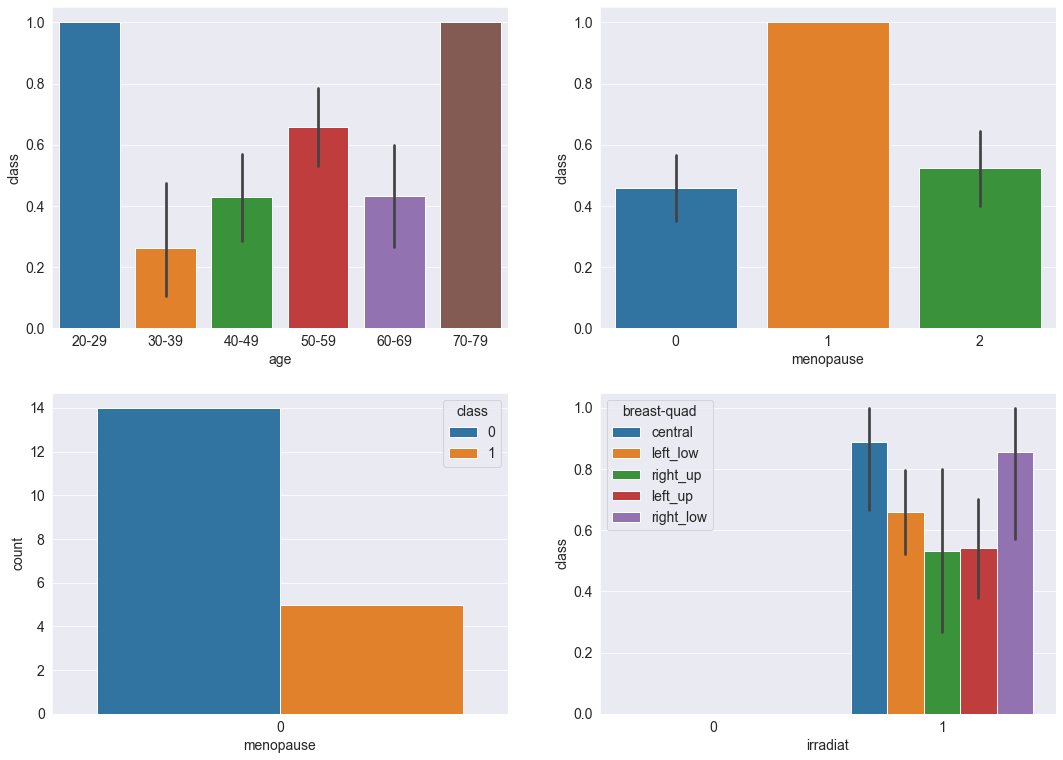

In [5]:
fig,axes = plt.subplots(2,2,figsize=(18,13))
sns.barplot(x='age',y='class',data=cancer,ax=axes[0,0],order=["20-29","30-39","40-49","50-59","60-69","70-79"])
sns.barplot(x='menopause',y='class',data=cancer,ax=axes[0,1])
sns.countplot(x='menopause',hue='class',data=cancer[cancer.age.isin(['30-39'])],ax=axes[1,0])
sns.barplot(x='irradiat',y='class',hue='breast-quad',data=cancer,ax=axes[1,1])

<AxesSubplot:xlabel='node-caps', ylabel='class'>

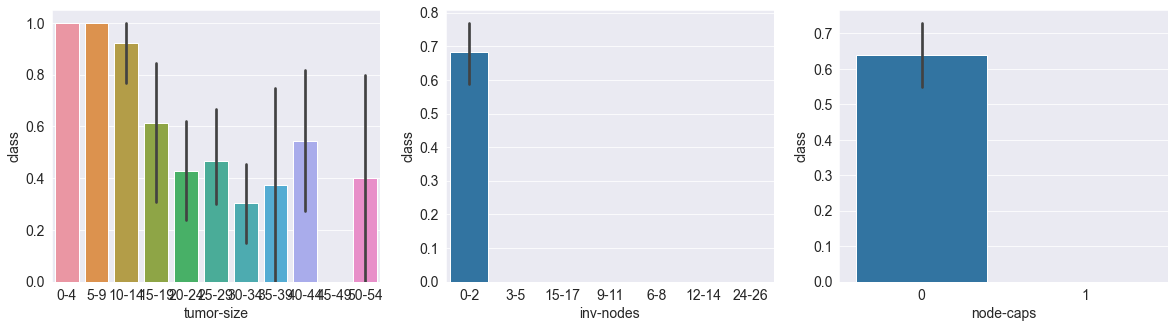

In [6]:
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(20,5))

sns.barplot(x='tumor-size',y='class',data=cancer,order=['0-4','5-9','10-14','15-19','20-24','25-29','30-34','35-39','40-44','45-49','50-54'],ax=ax1)
sns.barplot(x='inv-nodes',y='class',data=cancer,ax=ax2)
sns.barplot(x='node-caps',y='class',data=cancer,ax=ax3)

<AxesSubplot:xlabel='deg-malig', ylabel='class'>

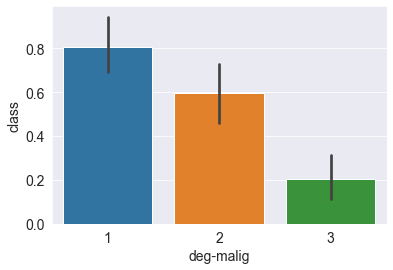

In [7]:
sns.barplot(x='deg-malig',y='class',data=cancer)

In [42]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

features = ['age','tumor-size','inv-nodes','breast-quad']
#print("encoding....")
for feature in features:  
    #非数字型和数字型标签值标准化
    le.fit(cancer[feature])
    cancer[feature] = le.transform(cancer[feature])
#print("over....")
cancer.head()

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast-quad,irradiat
0,1,2,0,0,0,0,3,0,1
1,1,3,2,4,0,0,2,1,1
2,1,4,1,1,0,0,1,4,1
3,1,3,2,4,0,0,3,4,1
4,1,2,0,5,0,0,3,2,1


In [111]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(cancer, test_size = 0.3)
print(train.shape)
print(test.shape)

(99, 9)
(43, 9)


In [120]:
train_x = train[train.columns[1:9]]
train_y = train['class']
train_x

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast-quad,irradiat
54,2,0,4,0,0,1,3,1
33,2,0,1,0,0,2,2,1
0,2,0,0,0,0,3,0,1
130,4,2,5,4,1,2,0,0
1,3,2,4,0,0,2,1,1
...,...,...,...,...,...,...,...,...
72,3,0,4,0,0,1,2,1
83,1,0,4,4,1,3,1,0
28,2,0,1,0,0,2,1,1
91,1,0,5,4,0,3,2,0


In [123]:
# 极度随机树
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier()
clf.fit(train_x, train_y.astype(int))
clf.feature_importances_

array([0.10664568, 0.0220913 , 0.15715417, 0.15207223, 0.13083545,
       0.20390306, 0.08066466, 0.14663345])

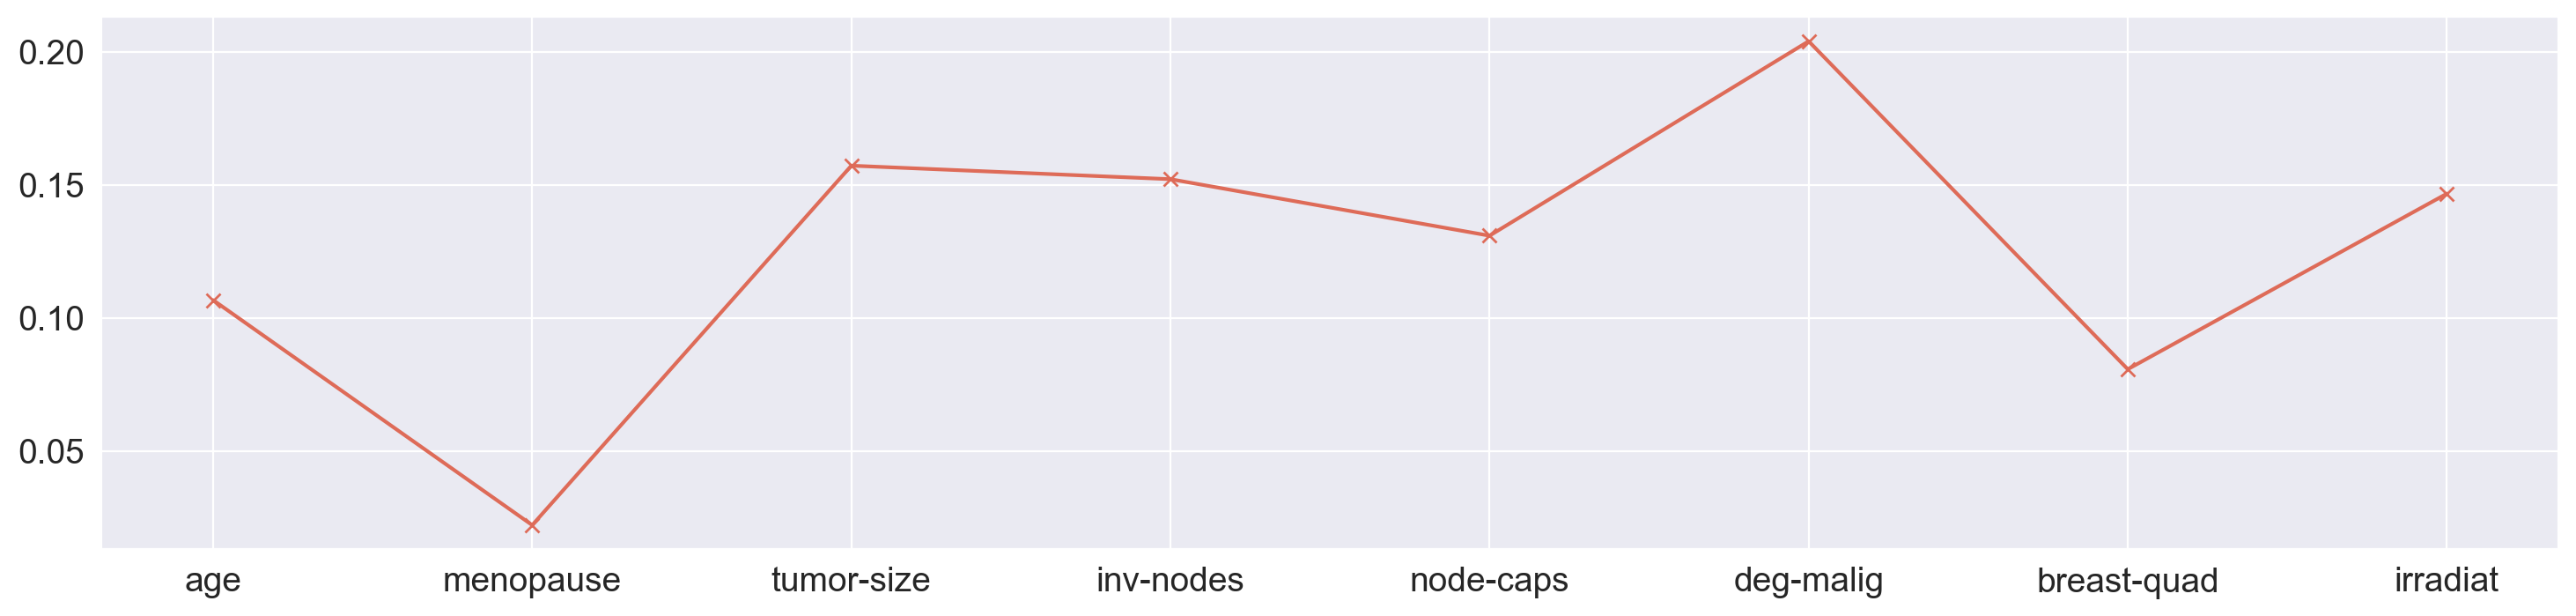

In [128]:
fig, axes = plt.subplots(1, 1, figsize=(18, 4))
# 折线图
axes.plot(train.columns[1:], clf.feature_importances_, linestyle = '-', color='#DE6B58', marker='x', linewidth=1.5)

In [129]:
fea_dict = [[f,s] for f,s in zip(train.columns[2:], clf.feature_importances_)]

In [130]:
fea_dict = sorted(fea_dict, key = lambda x: x[1], reverse=True)
fea_dict

[['breast-quad', 0.20390305897731464],
 ['inv-nodes', 0.15715416971910656],
 ['node-caps', 0.1520722318711062],
 ['deg-malig', 0.1308354483562624],
 ['menopause', 0.10664567664243432],
 ['irradiat', 0.08066466206739725],
 ['tumor-size', 0.022091303411461857]]

# 选择上面大于0.02的作为最终特征2

In [142]:
prediction_var = [k for k ,v in fea_dict if v > 0.02 ]
prediction_var

['breast-quad',
 'inv-nodes',
 'node-caps',
 'deg-malig',
 'menopause',
 'irradiat',
 'tumor-size']

<AxesSubplot:>

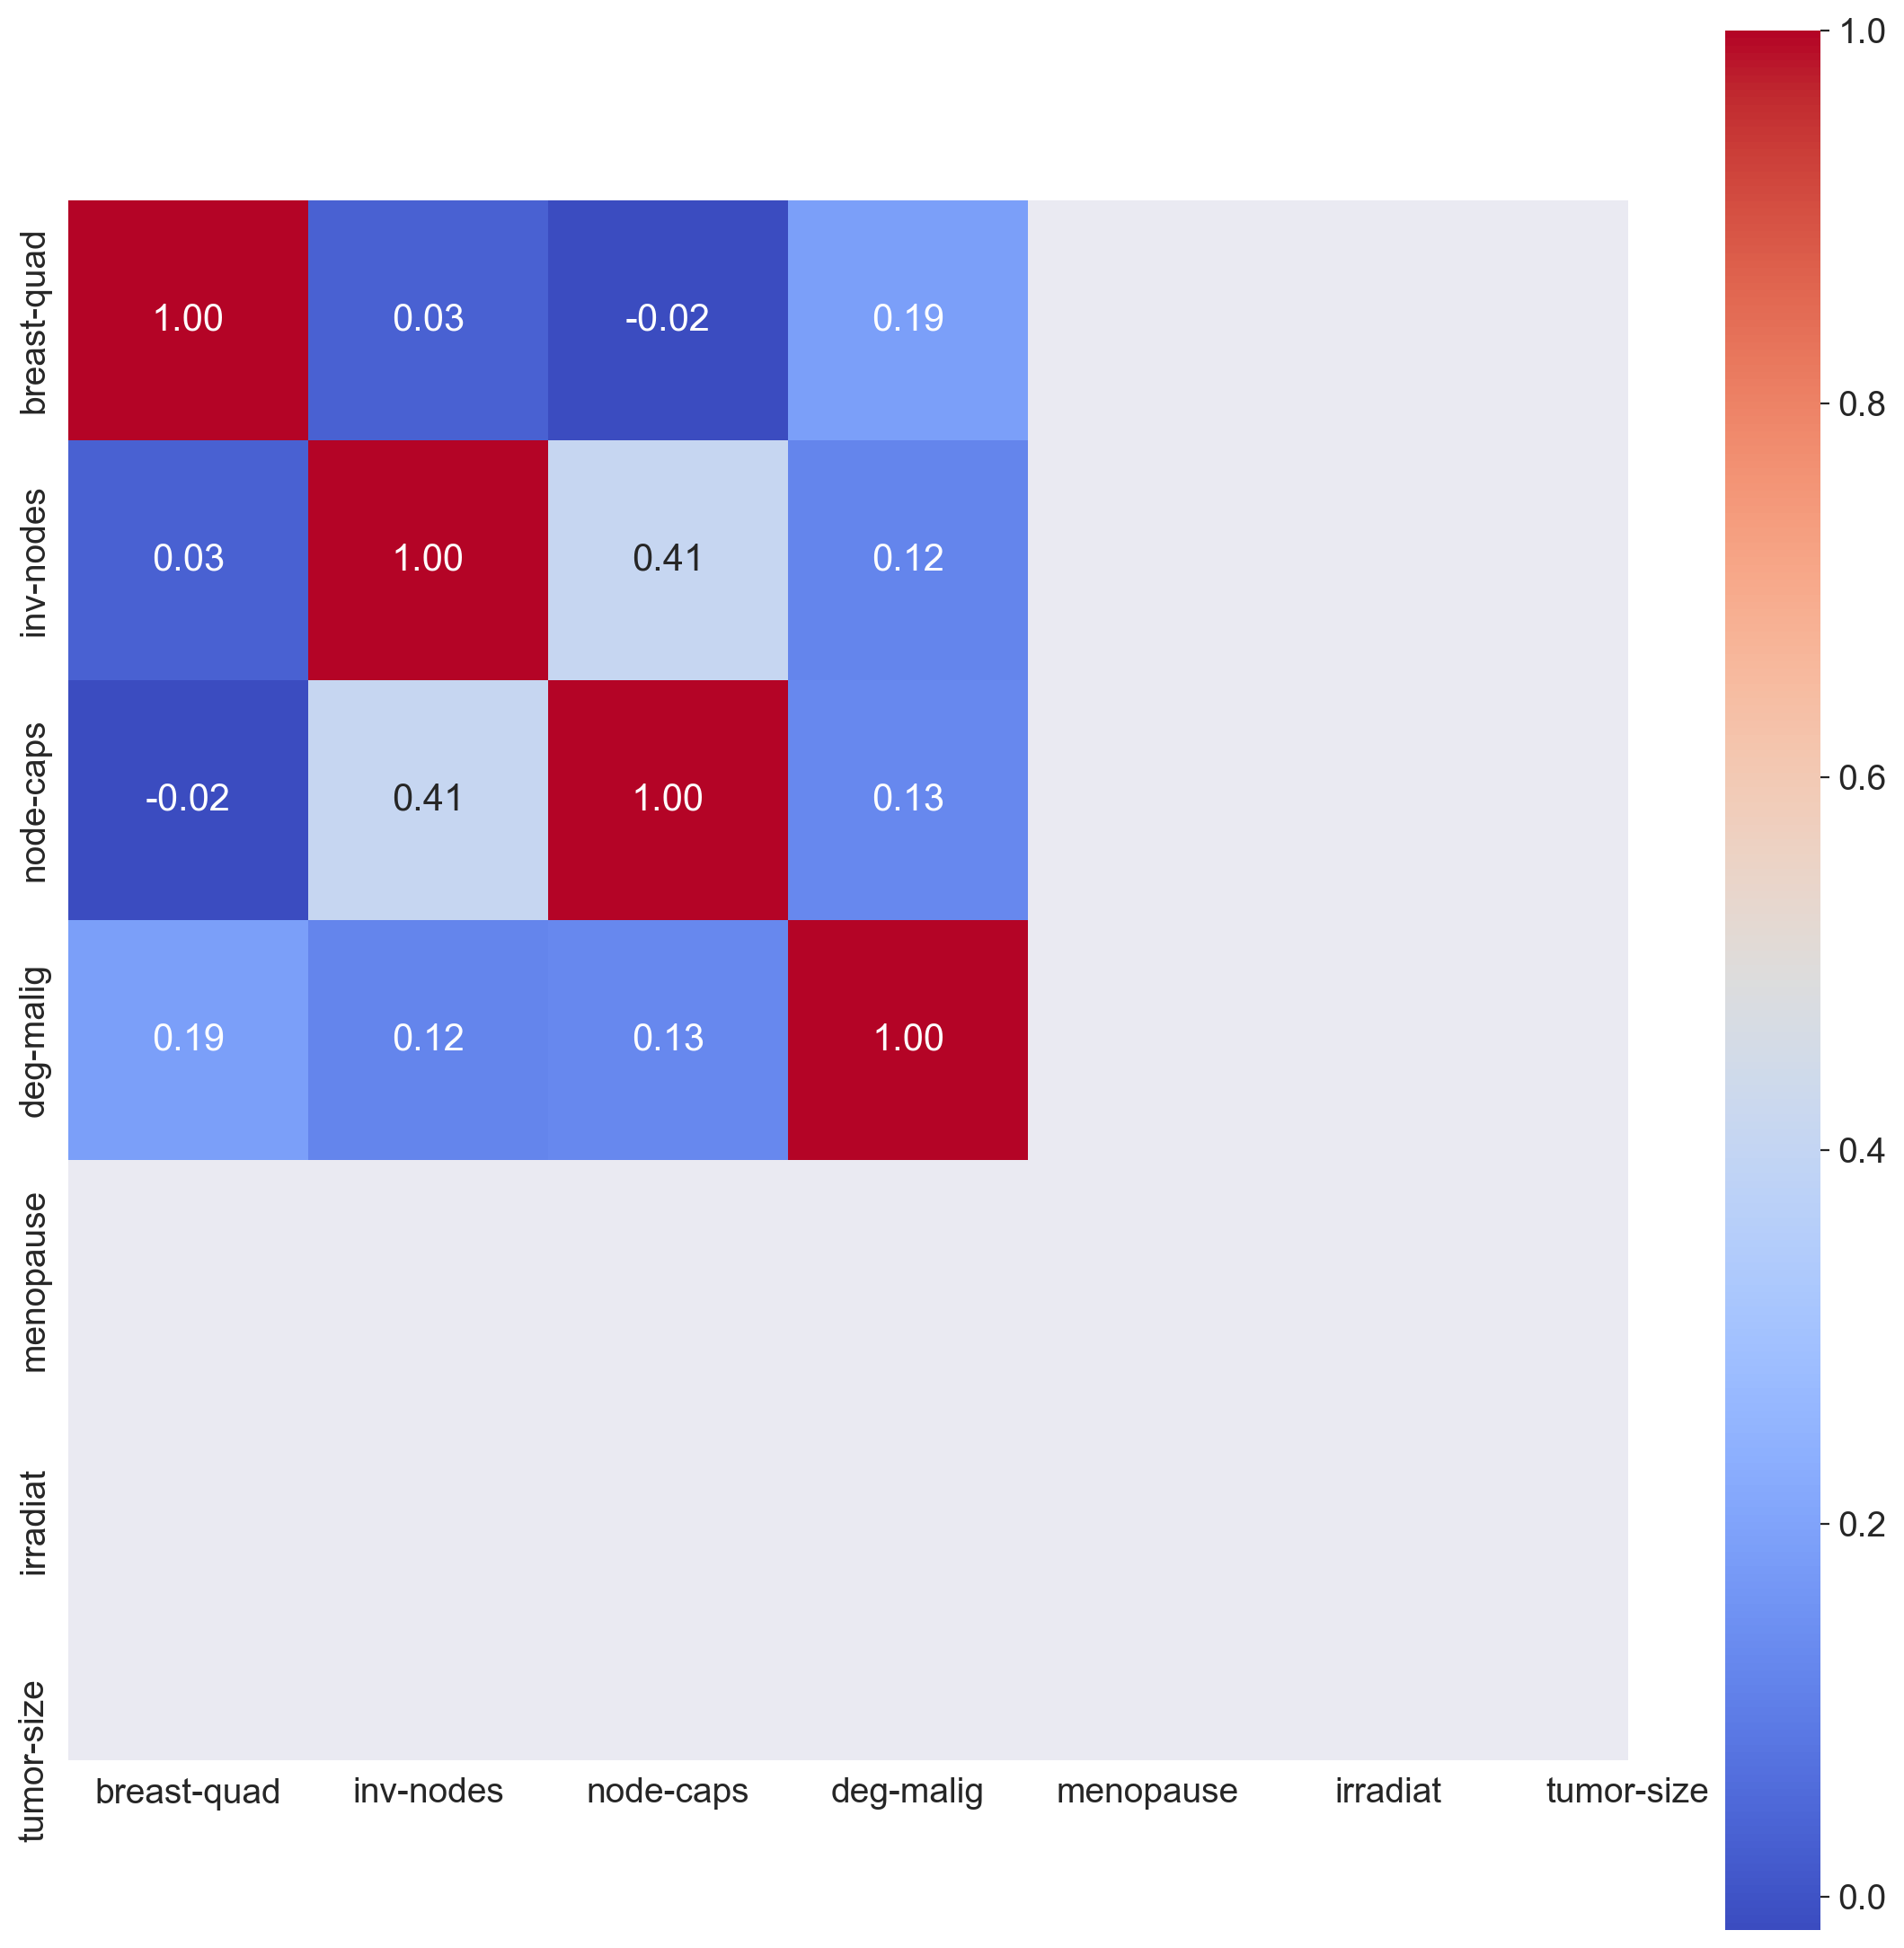

In [143]:
corr = cancer[prediction_var].corr()
plt.figure(figsize=(14, 14))

sns.heatmap(corr, cbar = True, square = True, annot=True, fmt = '.2f', annot_kws={'size': 15},
           xticklabels = prediction_var, yticklabels= prediction_var, 
           cmap = 'coolwarm')

In [66]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(cancer[cancer.columns[1:]], cancer['class'], test_size = 0.2, random_state=0)
print(train.shape)
print(test.shape)

(99, 9)
(43, 9)


In [59]:
# cancer.to_csv('初始化数据.csv', index = None)

In [76]:
# 用交叉验证法选择 随机森林回归 'n_estimators' 最优的参数
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import GridSearchCV#网格授索
import time
rf = RandomForestClassifier(random_state = 10)
time1 = time.time()
param_1 ={'n_estimators':list(range(400, 1000, 100))}
model_1 = GridSearchCV(estimator = rf, param_grid = param_1, cv=5, n_jobs=-1)
model_1.fit(x_train,y_train.astype(int))
print("model1最好的分数：{}".format(model_1.best_score_))
print("model1最好的参数：{}".format(model_1.best_params_))
print("model1消耗时间time=", (time.time()-time1)) #时间大概60
print("model1测试集的分数：{}".format(model_1.score(x_test, y_test.astype(int))))

model1最好的分数：0.8055335968379447
model1最好的参数：{'n_estimators': 800}
model1消耗时间time= 3.144059181213379
model1测试集的分数：0.896551724137931


In [80]:
# 2. 决策树回归
from sklearn import tree
time1 = time.time()
param_2={'max_depth':list(range(10,100,10)),'min_samples_leaf':list(range(1,10))}
model_2=GridSearchCV(estimator = tree.DecisionTreeClassifier(random_state=10),param_grid = param_2, n_jobs=1, cv=5)
model_2.fit(x_train,y_train.astype(int))
print("model2最好的分数：{}".format(model_2.best_score_))
print("model2最好的参数：{}".format(model_2.best_params_))
print("model2消耗时间time=", (time.time()-time1)) #时间大概60
print("model2测试集的分数：{}".format(model_2.score(x_test, y_test.astype(int))))

model1最好的分数：0.8059288537549406
model1最好的参数：{'max_depth': 10, 'min_samples_leaf': 9}
model1消耗时间time= 0.5044608116149902
model1测试集的分数：0.7931034482758621


In [84]:
# 3.KNN回归
from sklearn import neighbors
time1 = time.time()
param_3={'n_neighbors':[i for i in range(1,11)], 'p':[i for i in range(1,6)]} 
model_3=GridSearchCV(estimator = neighbors.KNeighborsClassifier(), param_grid = param_3, n_jobs=-1, cv=5)
model_3.fit(x_train,y_train.astype(int))
print("model3最好的分数：{}".format(model_3.best_score_))
print("model3最好的参数：{}".format(model_3.best_params_))
print("model3消耗时间time=", (time.time()-time1)) #时间大概60
print("model3测试集的分数：{}".format(model_3.score(x_test, y_test.astype(int))))

model3最好的分数：0.742687747035573
model3最好的参数：{'n_neighbors': 3, 'p': 1}
model3消耗时间time= 0.17588400840759277
model3测试集的分数：0.7931034482758621


In [92]:
# 4.逻辑回归
from sklearn.linear_model import LogisticRegression
time1 = time.time()
param_4={'C':[1, 2, 4], 'penalty':['l1', 'l2']}
model_4=GridSearchCV(estimator = LogisticRegression(), param_grid = param_4, n_jobs=1, cv=5)
model_4.fit(x_train,y_train.astype(int))
print("model4最好的分数：{}".format(model_4.best_score_))
print("model4最好的参数：{}".format(model_4.best_params_))
print("model4消耗时间time=", (time.time()-time1)) #时间大概60
print("model4测试集的分数：{}".format(model_4.score(x_test, y_test.astype(int))))

model4最好的分数：0.8047430830039526
model4最好的参数：{'C': 1, 'penalty': 'l2'}
model4消耗时间time= 0.06844282150268555
model4测试集的分数：0.896551724137931


/opt/anaconda3/envs/torch1.12/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/envs/torch1.12/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/envs/torch1.12/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/opt/anaconda3/envs/torch1.12/lib/python3.10/site-packages/sklearn/linear_model/_log

In [95]:
# 5. 梯度提升
from sklearn.ensemble import GradientBoostingClassifier
time1 = time.time()
param_5 = {'n_estimators':list(range(100, 600, 50))}
model_5 = GridSearchCV(estimator = GradientBoostingClassifier(), param_grid = param_5, n_jobs=-1, cv=5)
model_5.fit(x_train,y_train.astype(int))
print("model5最好的分数：{}".format(model_5.best_score_))
print("model5最好的参数：{}".format(model_5.best_params_))
print("model5消耗时间time=", (time.time()-time1)) #时间大概60
print("model5测试集的分数：{}".format(model_5.score(x_test, y_test.astype(int))))

model5最好的分数：0.7968379446640317
model5最好的参数：{'n_estimators': 100}
model5消耗时间time= 0.6839838027954102
model5测试集的分数：0.9310344827586207


In [98]:
# 6. SVC
from sklearn.svm import SVC
time1 = time.time()
param_6={'gamma':np.linspace(0, 0.001, 100)}
model_6=GridSearchCV(estimator = SVC(kernel = 'rbf'), param_grid = param_6, n_jobs=-1,cv=5)
model_6.fit(x_train,y_train.astype(int))
print("model6最好的分数：{}".format(model_6.best_score_))
print("model6最好的参数：{}".format(model_6.best_params_))
print("model6消耗时间time=", (time.time()-time1)) #时间大概60
print("model6测试集的分数：{}".format(model_6.score(x_test, y_test.astype(int))))

model6最好的分数：0.6988142292490119
model6最好的参数：{'gamma': 0.0009393939393939394}
model6消耗时间time= 0.2942180633544922
model6测试集的分数：0.8620689655172413


/opt/anaconda3/envs/torch1.12/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
5 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/envs/torch1.12/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/envs/torch1.12/lib/python3.10/site-packages/sklearn/svm/_base.py", line 237, in fit
    raise ValueError(msg)
ValueError: gamma value must be > 0; 0.0 is invalid. Use a positive number or use 'auto' to set gamma to a value of 1 / n_features.

  warnings.wa

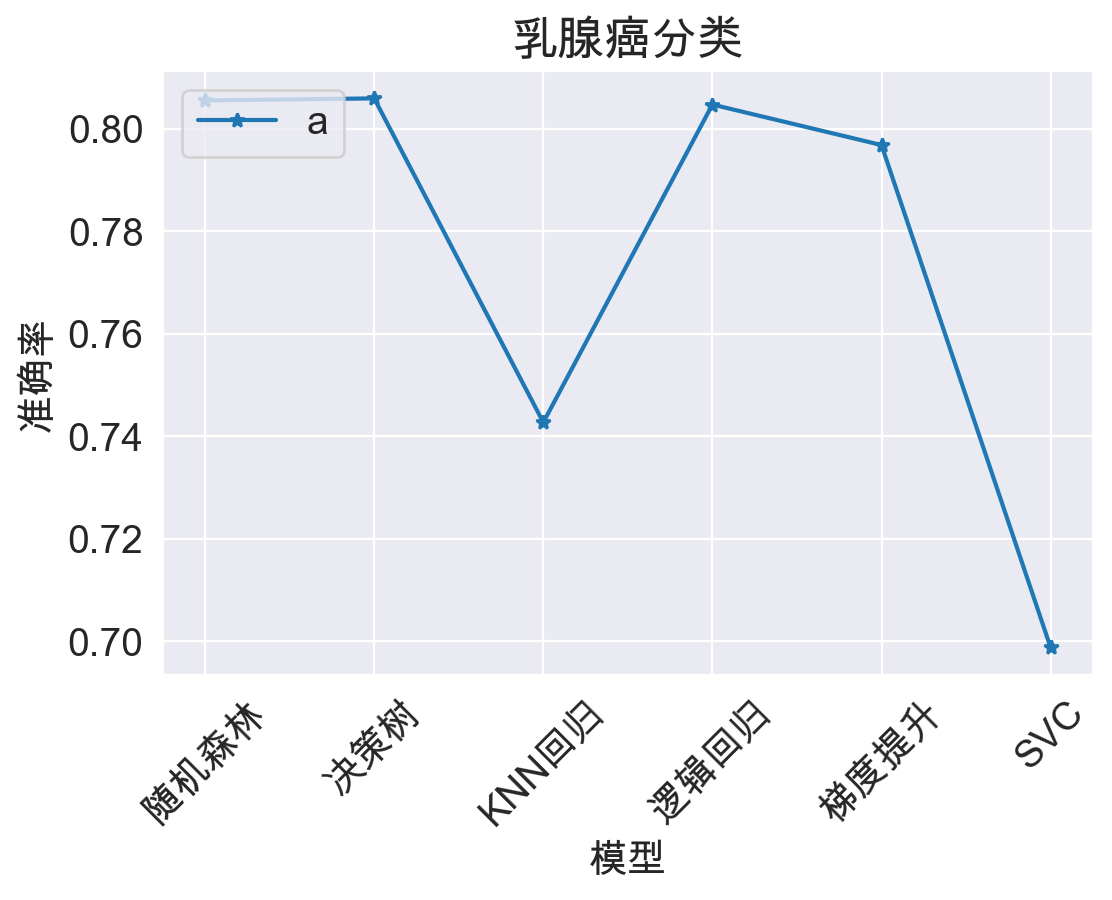

In [110]:
import matplotlib
import matplotlib.pyplot as plt
# matplotlib.rcParams['font. sans-serif'] = ['SimHei'] #用黑体显示中文
plt.rcParams["font.family"] = 'Arial Unicode MS'
plt.rcParams['figure.figsize']=(6.0, 4.0)
plt.rcParams['savefig.dpi']= 200 #图片像素
plt.rcParams['figure.dpi']= 200 #分辦率
# 默认的像素：16.0,4.0]，分辦率为100，图片尺寸为 6005400
# 指定dpi=200，图片尺寸为 1200*800
# 指定dpi=300，图片尺寸为 1800*1200
# 设置figsize可以在不改变分辦率情况下改变比例

x = ['随机森林', '决策树', 'KNN回归', '逻辑回归', '梯度提升', 'SVC',]
y1 = [model_1.best_score_, model_2.best_score_, model_3.best_score_,
      model_4.best_score_, model_5.best_score_, model_6.best_score_,]
y1 = [round(item, 4) for item in y1]
plt.plot(x, y1, marker='*', ms=5, label= "a")
     
plt.xticks(rotation=45)
plt.xlabel("模型")
plt.ylabel("准确率")
plt.title("乳腺癌分类")
plt.legend(loc="upper left")
plt.savefig("a.jpg")
plt.show()